In [13]:
## Import relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn import utils
import glob
import os
import cv2
from sklearn import decomposition 
from skimage import measure
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

np.random.seed(100)

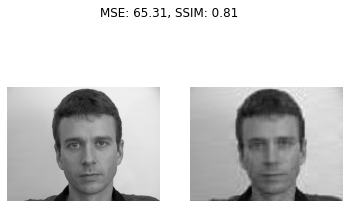

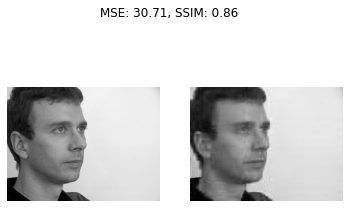

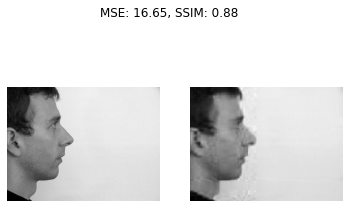

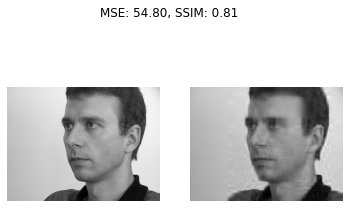

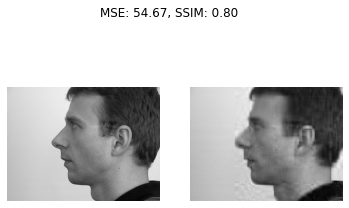

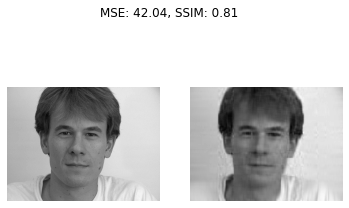

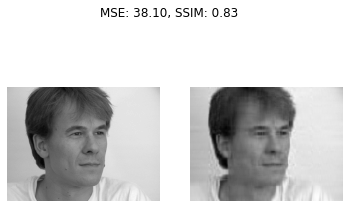

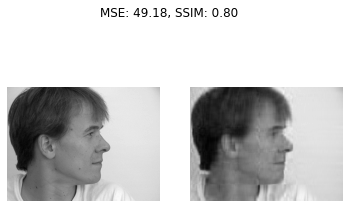

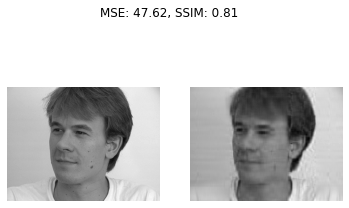

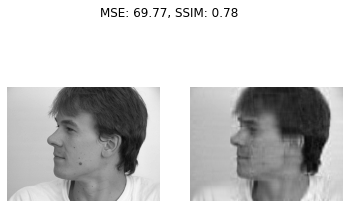

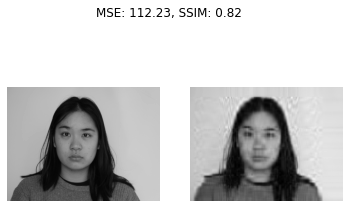

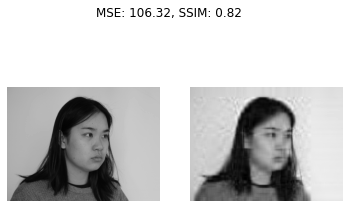

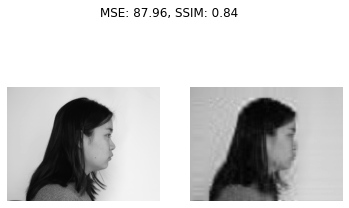

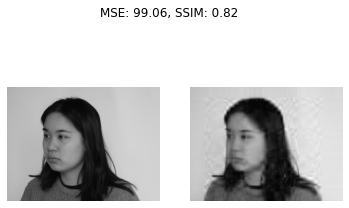

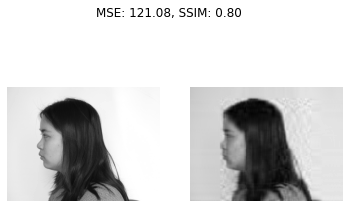

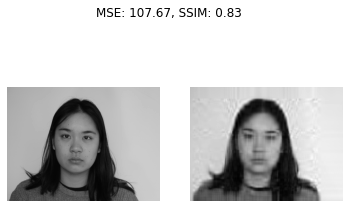

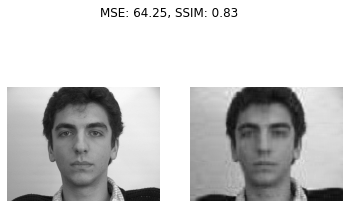

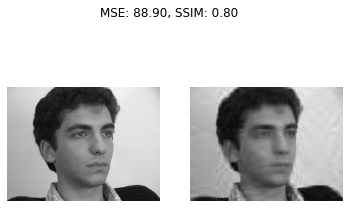

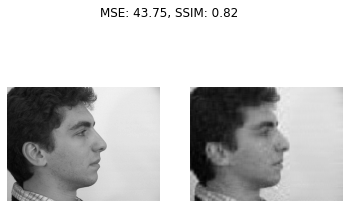

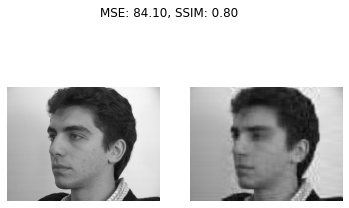

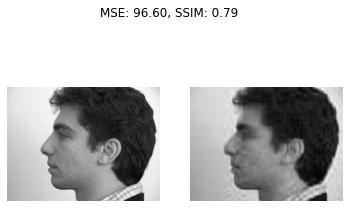

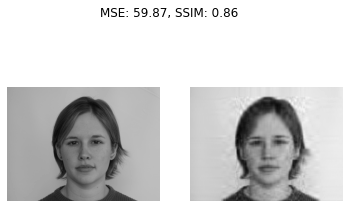

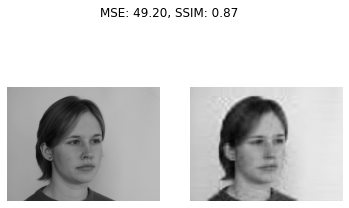

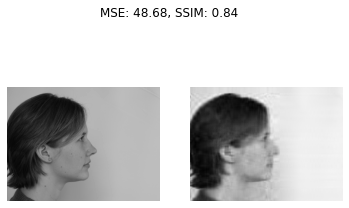

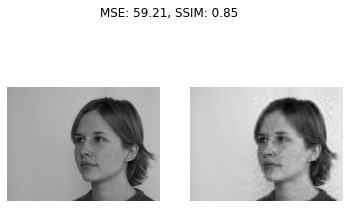

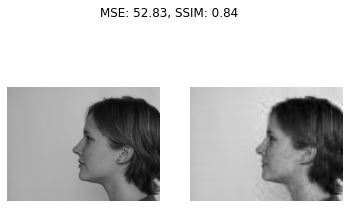

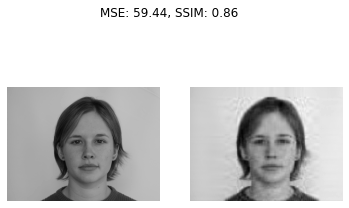

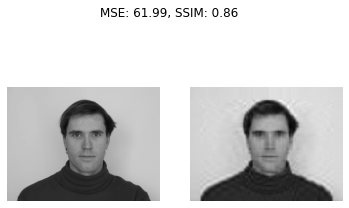

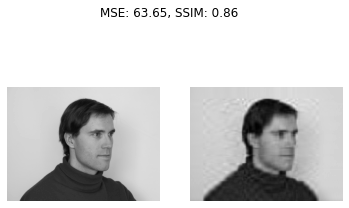

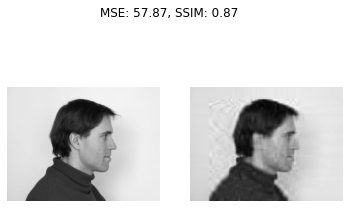

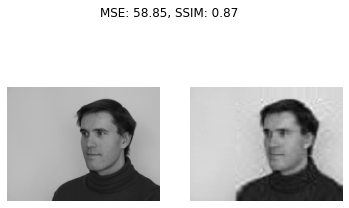

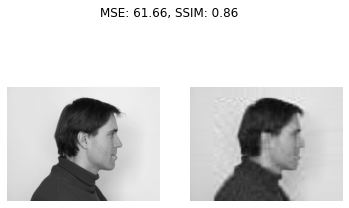

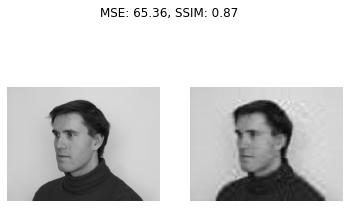

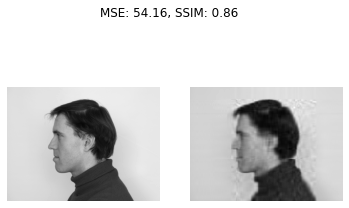

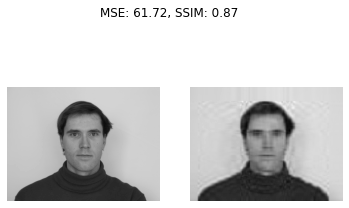

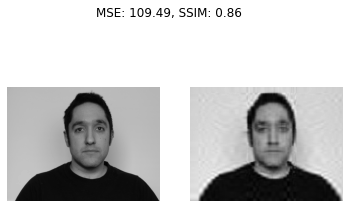

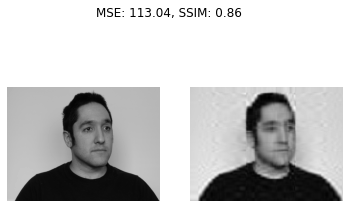

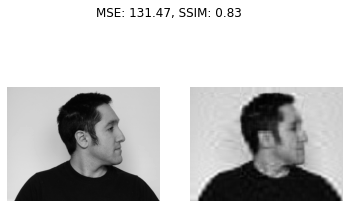

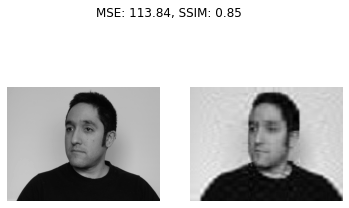

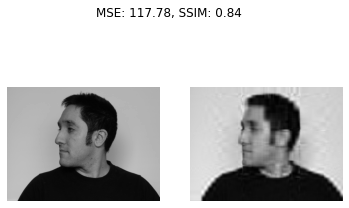

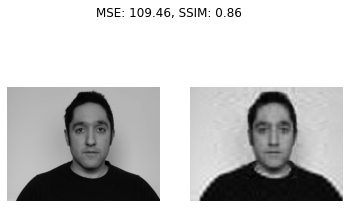

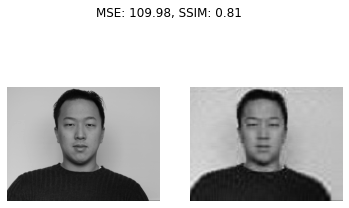

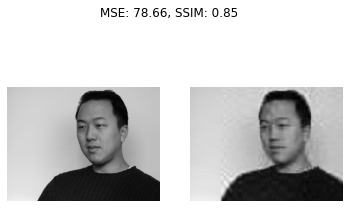

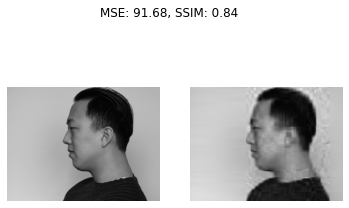

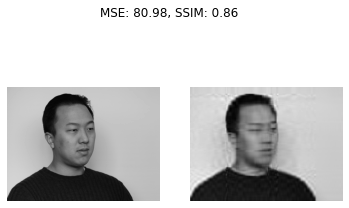

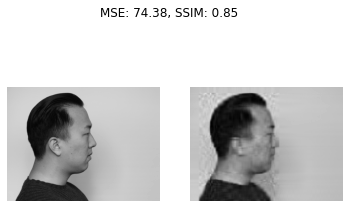

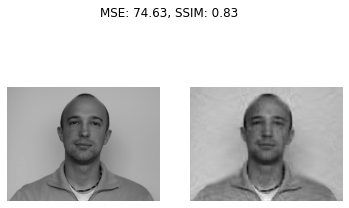

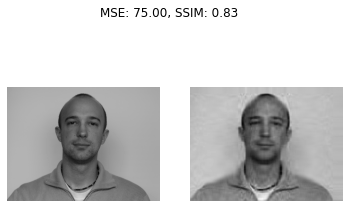

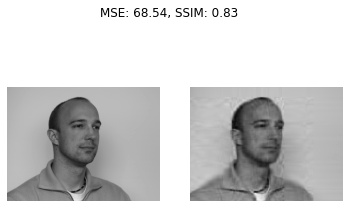

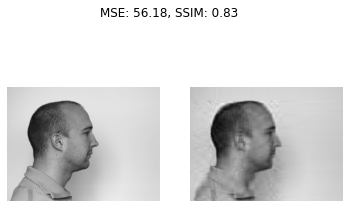

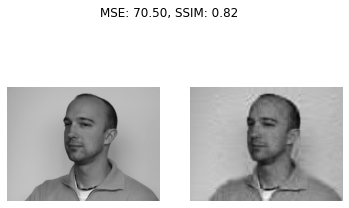

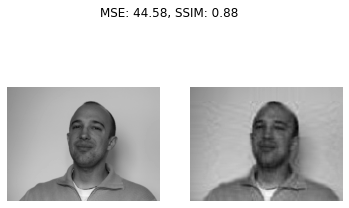

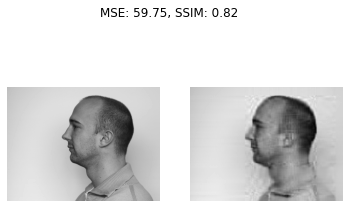

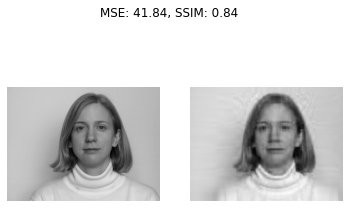

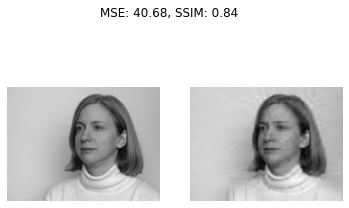

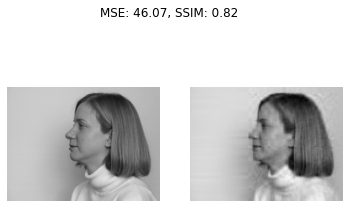

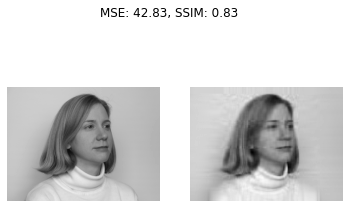

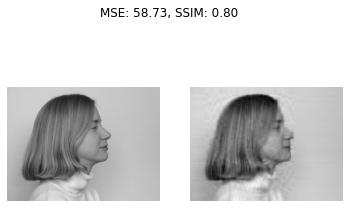

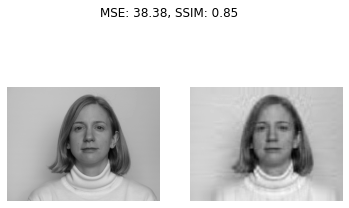

In [14]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def nonnegMatrixFactImages(file_path):
    files = os.path.basename(file_path)
    files = files.split(".")[0]+"_NMF."+files.split(".")[1]
    image_dir = 'C://Users//Priyanka Popeta//Downloads//MIT-CBCL-facerec-database//training-originals//NMF_training_originals'
    image_dir = os.path.join(image_dir,files)
    image_dir = image_dir.replace("\\","//")
    imageA = cv2.imread(file_path,0)  

    n_components = 20
    estimator = decomposition.NMF(n_components = n_components, init = 'random', tol=5e-3)    
    W = estimator.fit_transform(imageA)
    H = estimator.components_
    imageB = np.dot(W,H)
    
#   Comparing and printing original vs nmf images
    compareimage(imageA, imageB,files)
    cv2.imwrite(image_dir, imageB)
    return image_dir

def compareimage(imageA, imageB,files):
    s = measure.compare_ssim(imageA, imageB)
    m = mse(imageA, imageB)
    fig = plt.figure(files)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    plt.show()


original_dir = "C://Users//Priyanka Popeta//Downloads//MIT-CBCL-facerec-database//training-originals"

img_list = glob.glob(original_dir + "//*.jpg")
img_list = [l.replace('\\', '//') for l in img_list]
files = pd.DataFrame(img_list,columns=['file_path'])
files['NMF_file_path'] = files['file_path'].map(nonnegMatrixFactImages)   